In [20]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import truncate
import seaborn as sns
from matplotlib.patches import Patch
from toxifate import *

plt.rcParams.update({"figure.dpi": 400})
path = r"C:\Users\Roman\OneDrive - National University of Ireland, Galway\CellPainting project data\Harmony\Nv6-PerWell\tubesProfiles.csv"
fileName = path.rsplit('\\')[-1].rsplit('.')[0]
if 'tubes' in fileName:
    plotTitle = 'C2C12 myotubes'
else:
    plotTitle = 'C2C12 myoblasts'

prof = pd.read_csv(path)

prof = prof.dropna(axis=1)
loael = pd.read_csv("LOAEL.csv")
prof = prof.loc[prof['Count']>50]
prof

,Unnamed: 0,Row,Column,Compound,Concentration,PlateName,Count,Cell 33342 Radial Mean,Cell 33342 Radial Mean Ratio SER-Bright,Cell 33342 Radial Mean Ratio SER-Dark,...,Ring Region Alexa 568 SER Spot 0 px,Ring Region Alexa 568 SER Valley 0 px,Ring Region Alexa 647 SER Bright 0 px,Ring Region Alexa 647 SER Dark 0 px,Ring Region Alexa 647 SER Edge 0 px,Ring Region Alexa 647 SER Hole 0 px,Ring Region Alexa 647 SER Ridge 0 px,Ring Region Alexa 647 SER Saddle 0 px,Ring Region Alexa 647 SER Spot 0 px,Ring Region Alexa 647 SER Valley 0 px
0,0,3,3,DMSO,0,tubes1-BR1,3224,0.600711,-0.348750,0.164663,...,-0.036584,-0.027089,-1.294884,-1.229104,-0.973590,-1.371219,-1.167533,-0.721187,-1.367909,-1.051556
1,1,3,4,DMSO,0,tubes1-BR1,4068,-0.504455,-0.651280,0.298000,...,-0.230929,-0.507889,-1.347741,-1.219866,-1.262927,-1.317460,-1.284314,-1.297934,-1.317979,-1.208457
2,2,3,5,DMSO,0,tubes1-BR1,4116,-0.946694,-0.725068,1.210999,...,-0.151379,0.069423,-0.421093,-0.431964,-0.620446,-0.344321,-0.537939,-0.616827,-0.382839,-0.529425
3,3,3,6,DMSO,0,tubes1-BR1,3480,-0.085413,0.326409,0.265768,...,0.596080,0.989331,0.337820,0.355453,-0.118742,0.420613,0.279198,0.115494,0.412274,0.239092
4,4,3,7,NCAP,10,tubes1-BR1,4052,-0.291480,-0.693093,0.318357,...,-0.042687,-0.059754,0.051370,-0.004389,0.058404,0.039005,0.059885,0.101575,0.052888,0.062998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,223,14,18,ZIDO,3000,tubes5-BR3,266,-0.121273,-0.666475,0.978909,...,1.004159,0.520513,-0.228106,-0.142060,0.466698,-0.359934,-0.252941,0.201510,-0.086180,-0.152539
3346,224,14,19,ZIDO,10000,tubes5-BR3,195,1.240910,0.017617,-0.353346,...,0.821263,0.796513,0.217136,-0.001125,0.755005,-0.169022,0.350839,0.372725,0.209249,-0.059369
3347,225,14,20,ZIDO,10000,tubes5-BR3,215,0.447900,-0.030684,-0.362061,...,0.690212,0.372816,-0.552935,-0.384827,0.101728,-0.586914,-0.377024,-0.042092,-0.925277,-0.333431
3348,226,14,21,ZIDO,30000,tubes5-BR3,129,0.059321,1.068168,-1.012300,...,1.754688,2.350562,1.080735,1.535850,2.434388,1.193210,1.232498,2.425582,0.934611,2.002271


In [21]:
prof.drop(columns='Unnamed: 0', inplace=True)
std = pd.DataFrame(prof.std(numeric_only=True))
prof = prof.drop(columns=['PlateName'])
prof.set_index(['Compound','Concentration'],inplace=True,drop=True,append=True)
prof.head()
count = prof.pop('Count')
i = len(prof.index)-1
metadata = pd.concat([prof.iloc[:,0]],axis=1)
data = prof.iloc[:,1:i]
std = pd.DataFrame(data.std(numeric_only=True))
filtFeatures = std.loc[std[0] < 1000].index.tolist()
data = data.filter(items=filtFeatures,axis=1)

profFiltered = pd.concat([metadata,data],axis=1)
profFiltered.reset_index(inplace=True)
profFiltered.set_index(['Compound','Concentration'])
profFiltered.drop('level_0',axis=1)
#profFiltered = profFiltered.loc[(profFiltered['Concentration']==1000) | (profFiltered['Compound']=="DMSO")]
#profFiltered = loael.merge(profFiltered, left_on=['Compound','Concentration'],right_on=['Compound','Concentration'], how='inner')

meanProf = profFiltered.groupby(by=['Compound','Concentration']).mean()
meanProf

level_0        Row     Column  \
Compound Concentration                                      
ATOR     10              268.090909   5.545455   7.545455   
         30              270.090909   5.545455   9.545455   
         100             272.090909   5.545455  11.545455   
         300             274.090909   5.545455  13.545455   
         1000            296.166667   5.500000  15.500000   
...                             ...        ...        ...   
ZIDO     300            3102.833333  13.500000  13.500000   
         1000           3104.833333  13.500000  15.500000   
         3000           3106.833333  13.500000  17.500000   
         10000          3108.833333  13.500000  19.500000   
         30000          3110.833333  13.500000  21.500000   

                        Cell 33342 Radial Mean   \
Compound Concentration                            
ATOR     10                            0.097422   
         30                           -0.544848   
         100                           0.291686   
         300                          -0.567623   
         1000                         -0.352377   
...                                         ...   
ZIDO     300                          -0.124940   
         1000                          0.404918   
         3000                         -0.069570   
         10000                         0.057122   
         30000                        -0.014397   

                        Cell 33342 Radial Mean Ratio SER-Bright  \
Compound Concentration                                            
ATOR     10                                           -0.508466   
         30                                           -0.459921   
         100                                           0.182306   
         300                                          -0.538629   
         1000                                         -0.827197   
...                                                         ...   
ZIDO     300                                           0.174492   
         1000                                         -0.493613   
         3000                                         -0.399981   
         10000                                        -0.501804   
         30000                                        -0.619899   

                        Cell 33342 Radial Mean Ratio SER-Dark  \
Compound Concentration                                          
ATOR     10                                          0.146344   
         30                                          0.009965   
         100                                        -0.396480   
         300                                        -0.037251   
         1000                                        0.292767   
...                                                       ...   
ZIDO     300                                         0.120561   
         1000                                        0.065013   
         3000                                        0.722471   
         10000                                       0.395857   
         30000                                       0.381367   

                        Cell 33342 Radial Mean Ratio SER-Edge  \
Compound Concentration                                          
ATOR     10                                         -0.453969   
         30                                         -0.816501   
         100                                        -0.393953   
         300                                        -0.852200   
         1000                                       -0.086499   
...                                                       ...   
ZIDO     300                                         0.259966   
         1000                                       -0.575765   
         3000                                        1.015289   
         10000                                       0.573799   
         30000                                       0.308478   

      

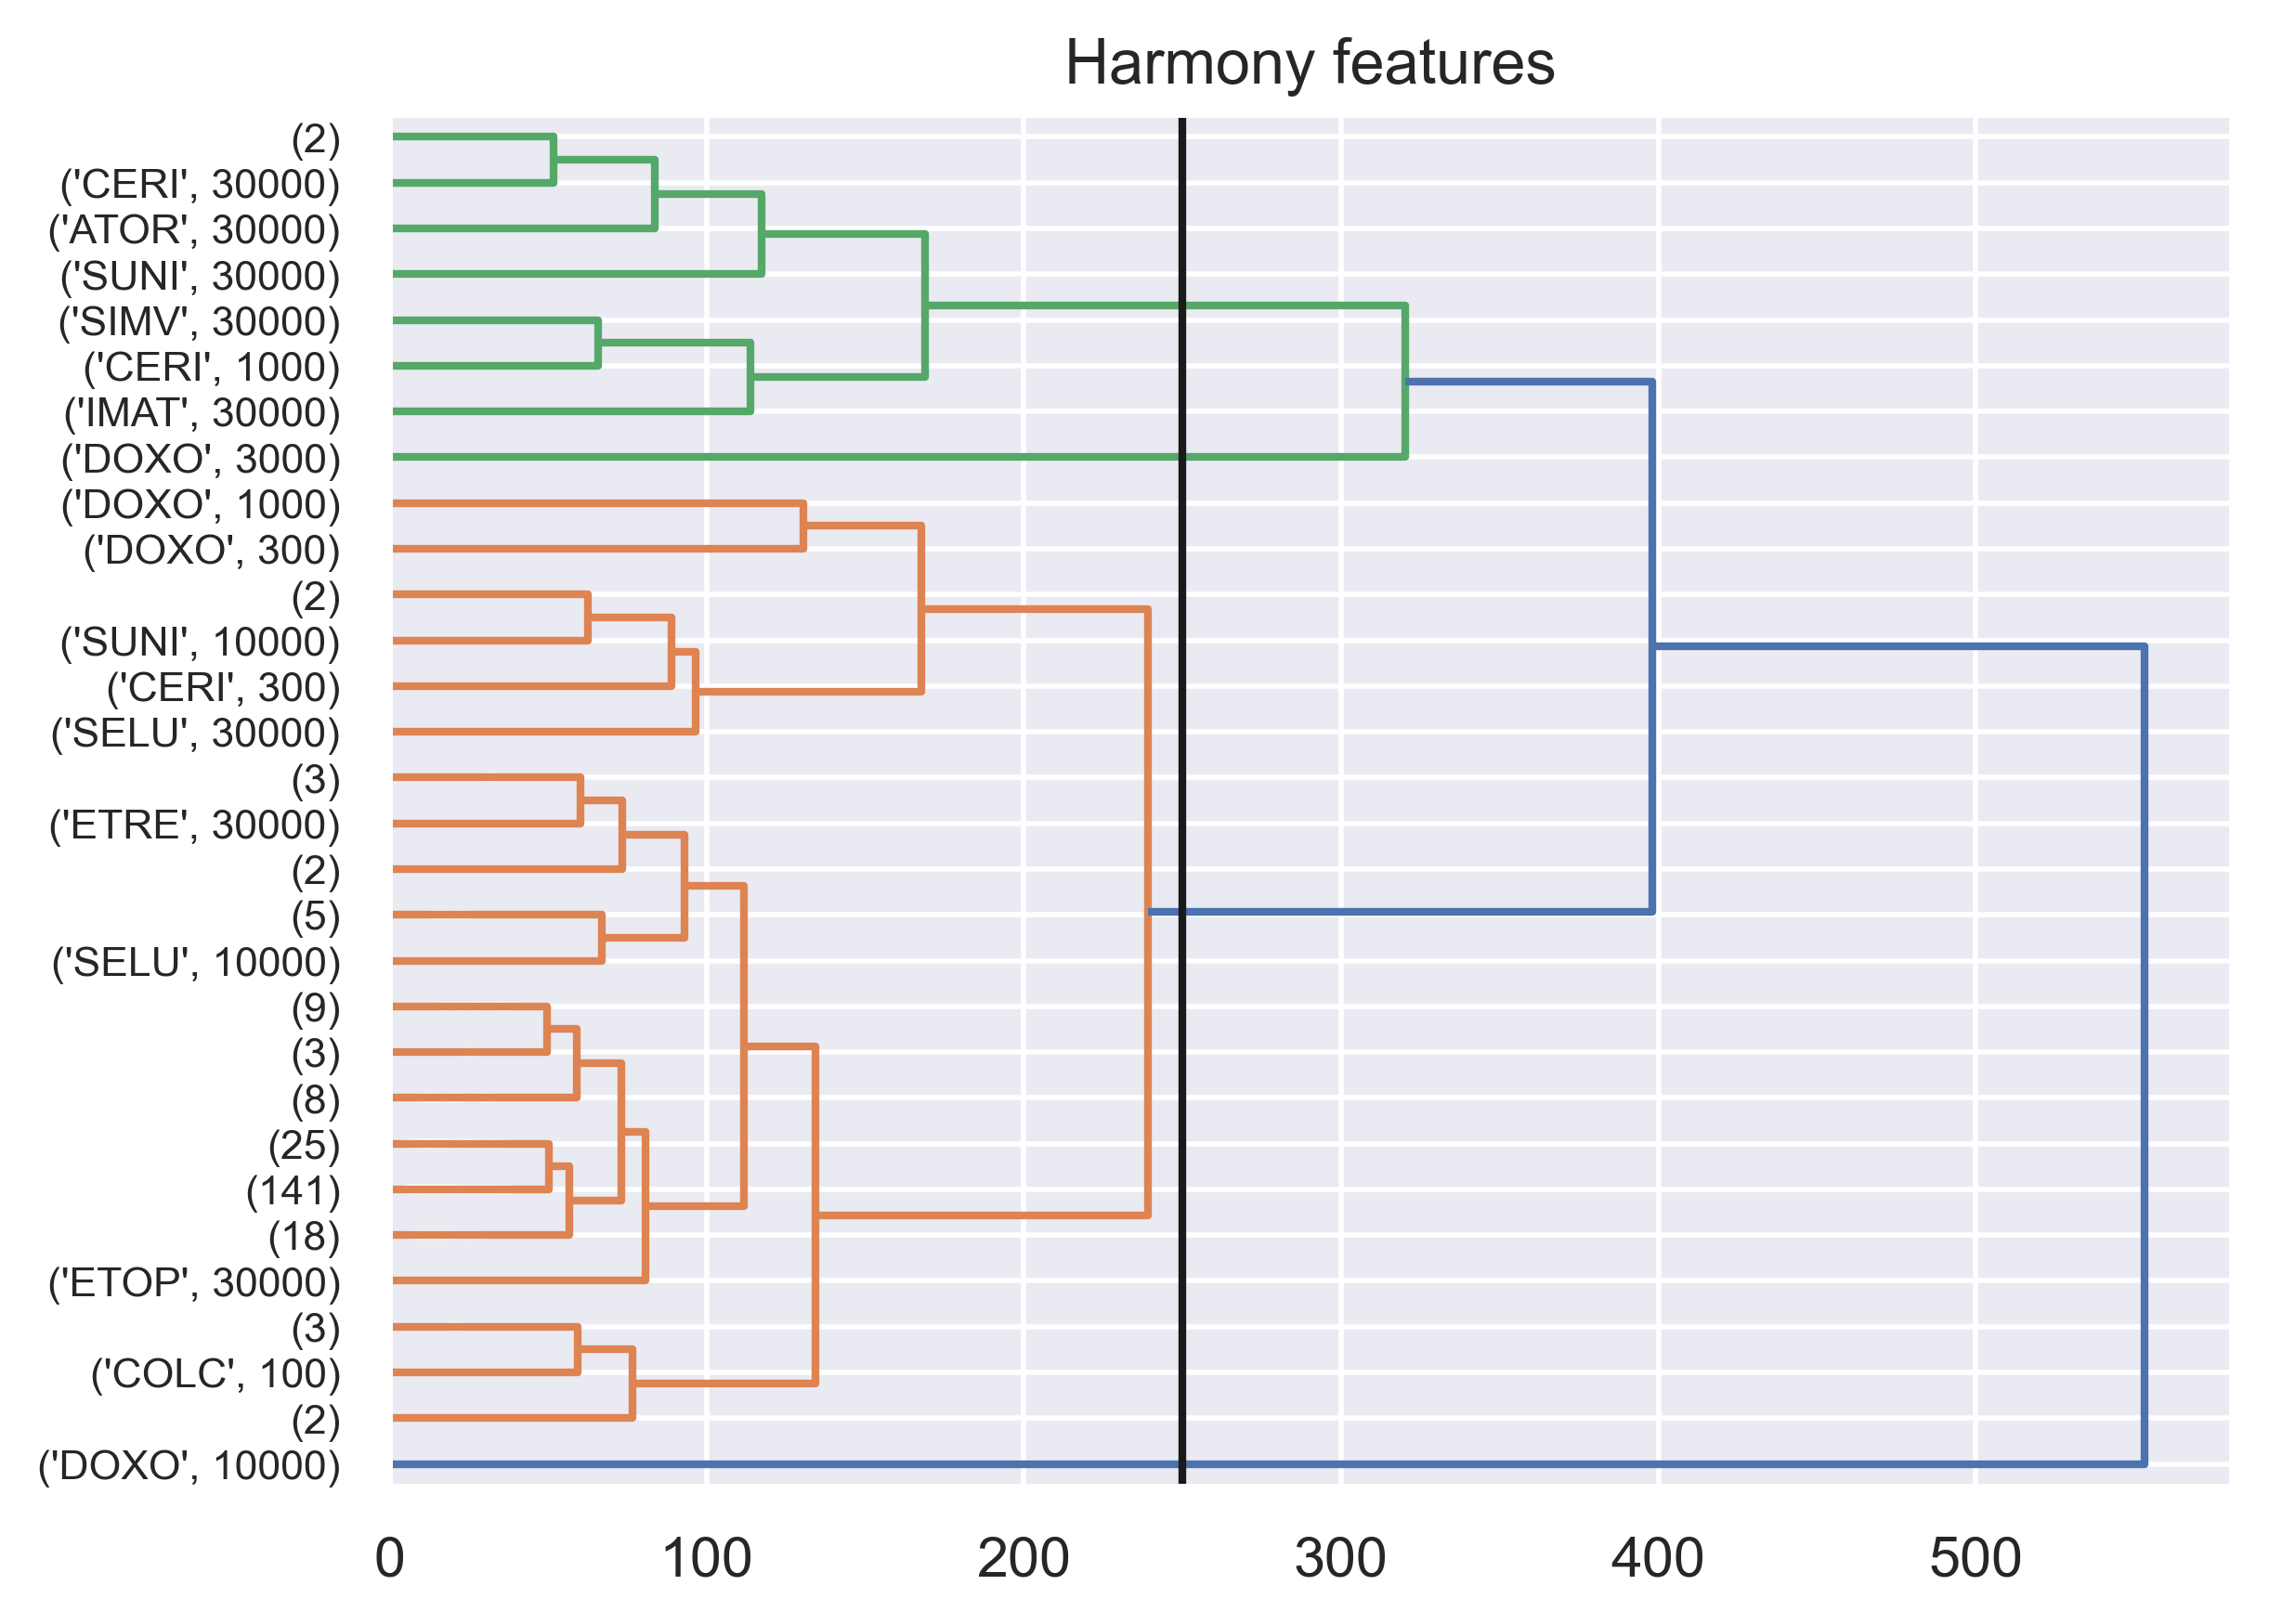

In [22]:
#plt.figure(figsize=(4,4),dpi=400)
plt.title("Harmony features")

meanDataForLinkage = meanProf.iloc[:, 1:]
clustersMean = sch.linkage( meanDataForLinkage, 
                            method='complete', 
                            metric="euclidean")

sch.dendrogram(     Z=clustersMean,
                    labels=meanDataForLinkage.index.values, 
                    orientation='right',
                    leaf_font_size=8,
                    leaf_rotation=0, 
                    truncate_mode='lastp',
                    show_contracted=True)

#clustersMean['Sample'] = meanDataForLinkage.reset_index(level=[0,1]).index.values
max_d = 250 #0.15e18 for blasts
plt.axvline(x=max_d, c='k')
plt.show()

meanProf.drop(columns=['level_0','Row','Column'], inplace=True)

In [23]:
meanProf = meanProf.reset_index()
drugs = meanProf['Compound']
meanProf.set_index(['Compound','Concentration'], inplace=True)

In [24]:
meanProf = drop_correlated_columns(meanProf, 0.9, numeric=False)
regionColors, channelColors, classColors  = get_feature_colors_harmony(meanProf)
region_list, channel_list, class_list = get_feature_lists_harmony(profile_type='harmony')
region_map, channel_map, class_map = get_feature_maps_harmony()

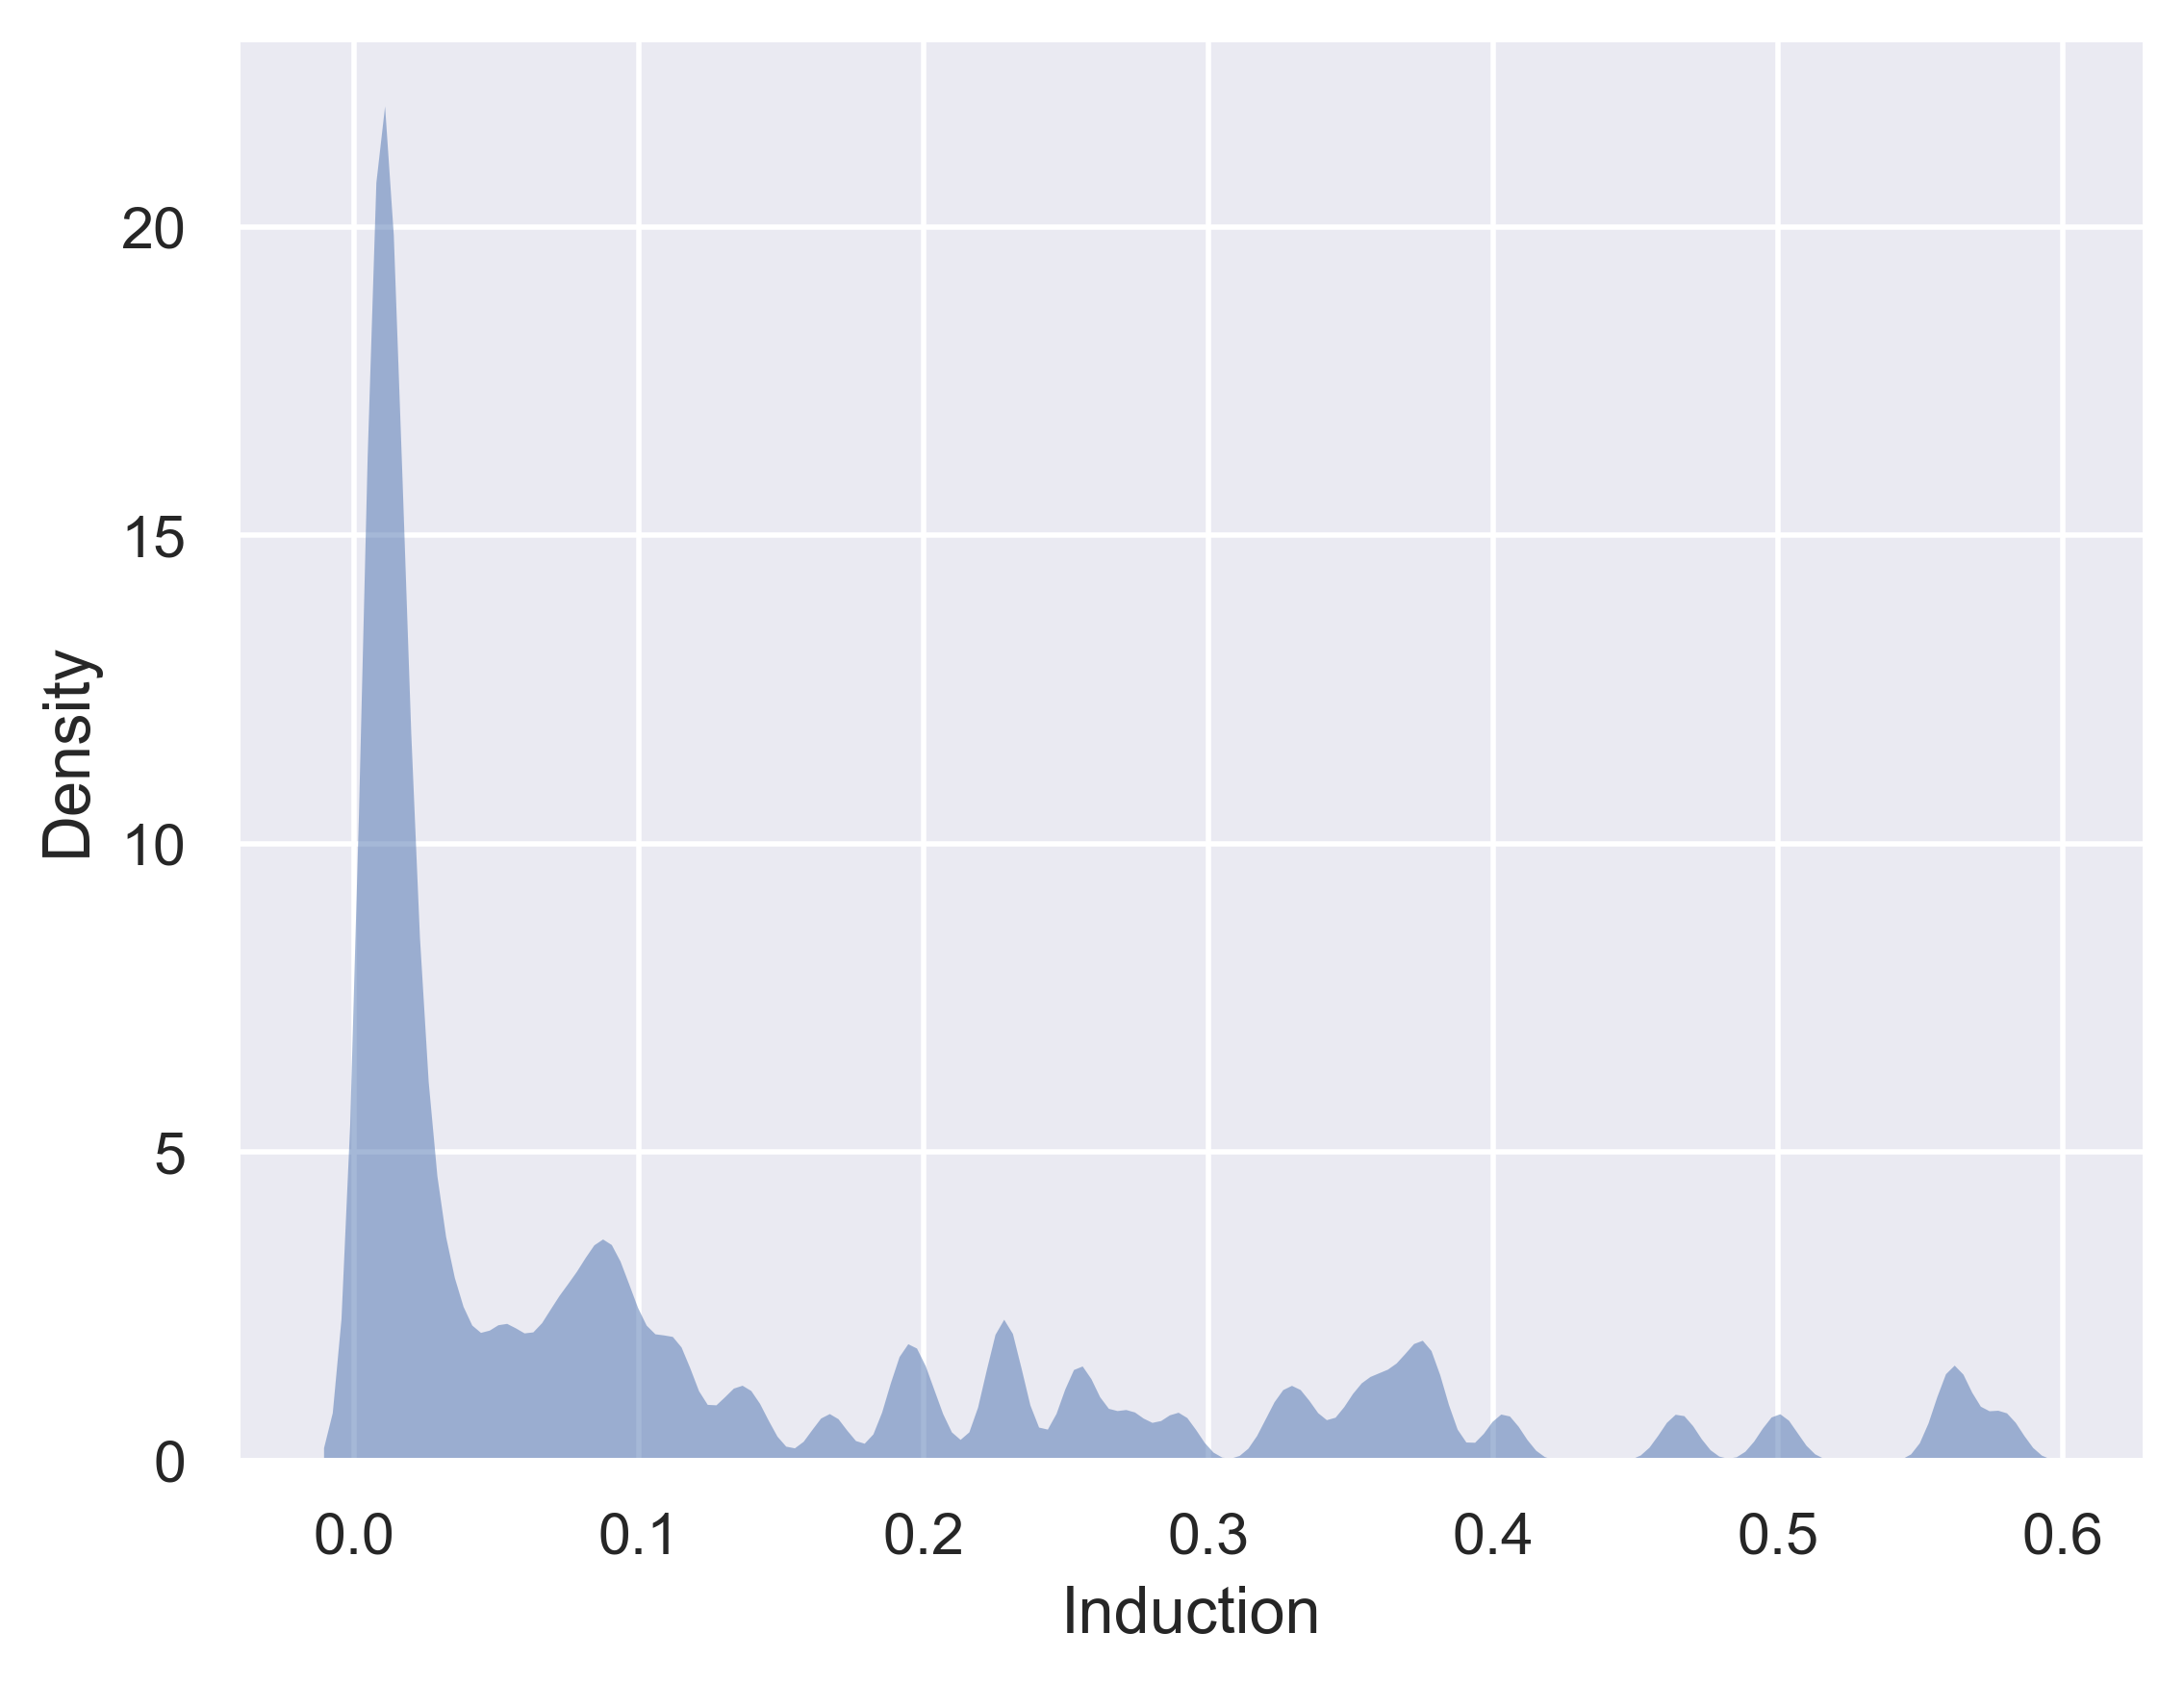

In [25]:
df = meanProf.copy()
# Create a new column 'count' and initialize it with 0
df['Induction'] = 0

# Iterate through the rows of the dataframe
for i, row in df.iterrows():
    count = 0
    # Iterate through the values in the row
    for value in row:
        if value > 3 or value < -3:
            count += 1
    indRatio = count / len(df.columns)
    # Assign the count to the corresponding row in the 'count' column
    df.at[i, 'Induction'] = indRatio

df = df.loc[(df['Induction']>=0) & (df['Induction']>0.0)]


df.reset_index(inplace=True)
sns.kdeplot(x=df['Induction'], fill = True, bw_adjust=.1, common_norm=False, alpha=.5, linewidth=0)
plt.show()

replacement_dict = {0: '0', 10: '10', 30: '30', 100: '100', 300: '300', 1000: '1k', 3000: '3k', 10000: '10k', 30000: '30k'}

# Replace values in the "Concentration" column using the dictionary
df['Concentration'] = df['Concentration'].replace(replacement_dict)
df = df.set_index(['Compound','Concentration'])


In [26]:
filtDF = df
filtDF.drop(columns=['Induction'], inplace=True, errors='ignore')
#dis = sns.displot(
#    data=df, x="Induction", col="Compound",
#    kind="kde", height=4, aspect=.7,warn_singular=False, col_wrap=6, facet_kws={'sharey': False, 'sharex': True}, bw_adjust=0.1)
#df = df.set_index(['Compound','Concentration'])


C:\Users\Roman\AppData\Local\Temp\ipykernel_71456\3204341495.py:68: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


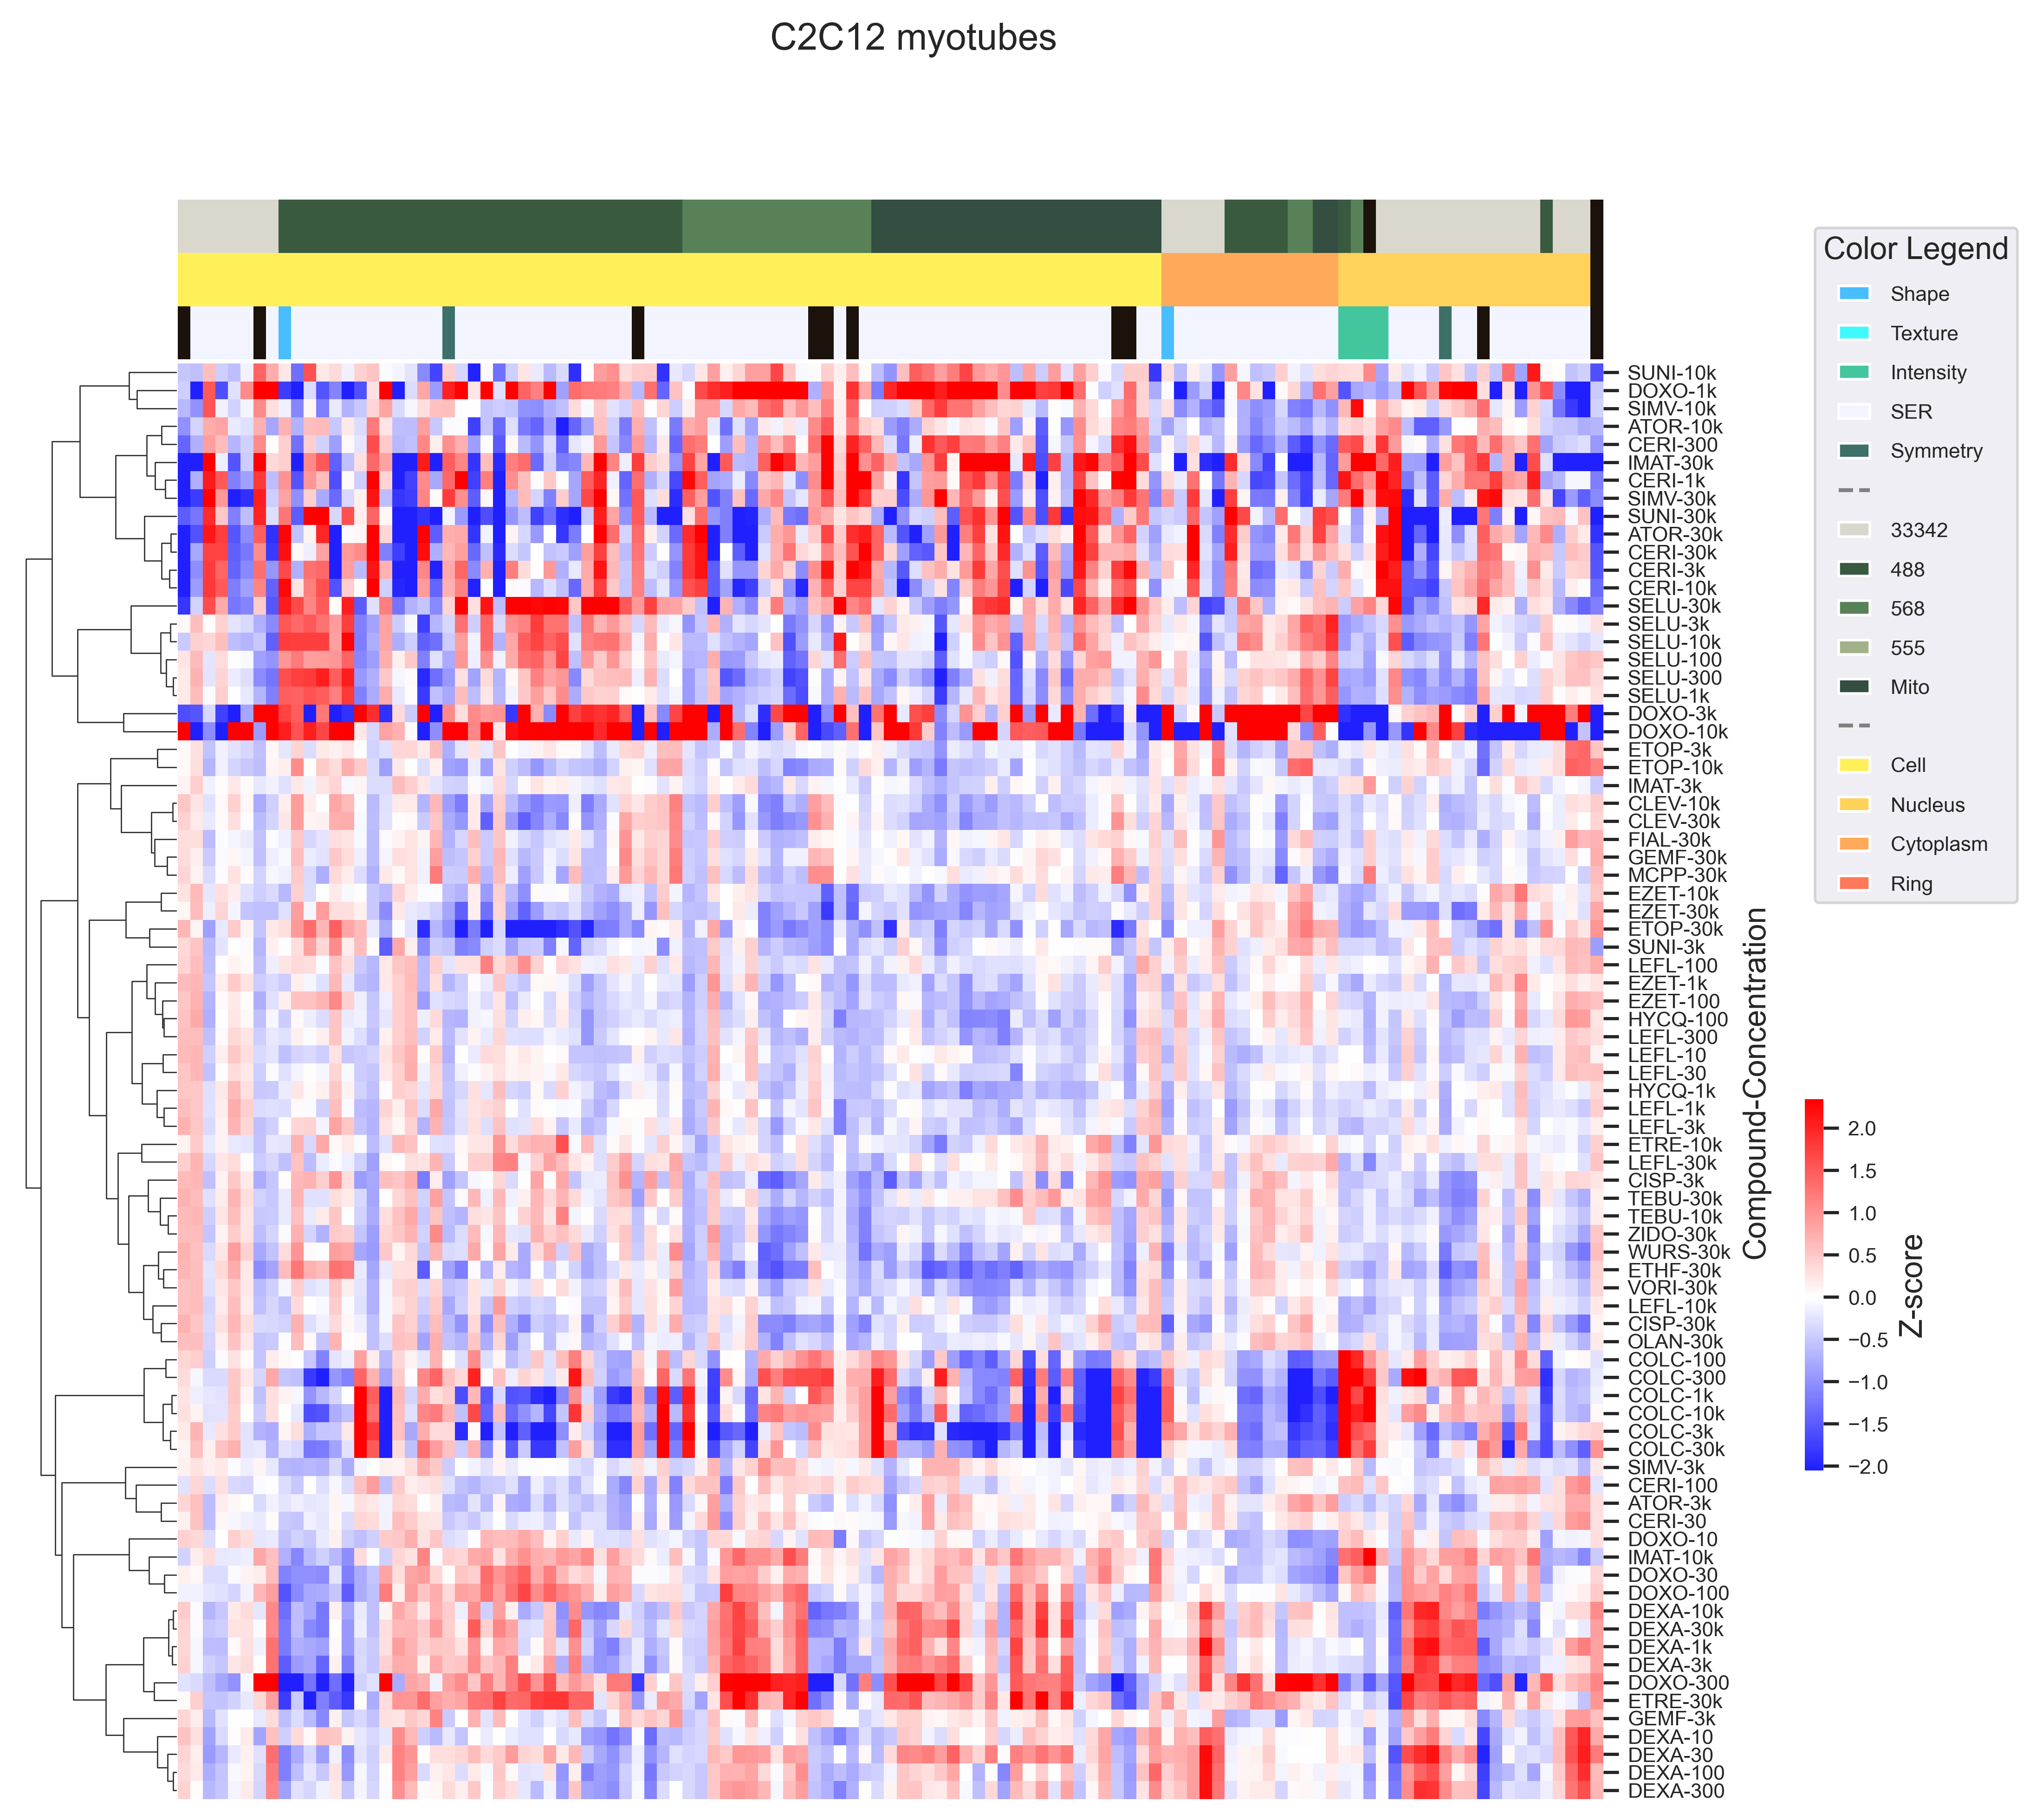

In [27]:
#colors = classColors # choose classColors, regionColors or channelColors
sns.set()
kws = dict(cbar_kws=dict(label='Z-score', orientation='vertical'))

cmap = sns.diverging_palette(   242, 20, l=80, s=80,
                                sep = 20,
                                center='dark', 
                                as_cmap=True,)

ax=sns.clustermap(
    filtDF,
    row_cluster=True,
    col_cluster=False,
    col_colors = [channelColors, regionColors, classColors],
    z_score = 1,
    metric = 'correlation',
    cmap = 'bwr',
    xticklabels=False,
    yticklabels=True,
    method = 'complete',
    center = 0.0,
    robust=True,
    dendrogram_ratio = 0.1,
    **kws )

x0, _y0, _w, _h = ax.cbar_pos
ax.ax_cbar.set_position([0.98, 0.2, 0.01, 0.2])
ax.ax_cbar.tick_params(axis='x', length=10)
ax.tick_params(axis='y', which='both', labelsize=8)
ax.fig.suptitle(plotTitle) 

# Create a list of Patch objects with the corresponding colors for each category
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Create a list of handles and labels for each color group
class_handles = [Patch(facecolor=class_map[name]) for name in class_list]
class_labels = class_list

channel_handles = [Patch(facecolor=channel_map[name]) for name in channel_list]
channel_labels = channel_list

region_handles = [Patch(facecolor=region_map[name]) for name in region_list]
region_labels = region_list

# Create a list of column titles
column_titles = ['Feature class', 'Channel', 'Region']

# Create the legend using the handles and labels for each color group
import matplotlib.lines as mlines

# Create line separators
class_line = mlines.Line2D([], [], color='gray', linestyle='--')
channel_line = mlines.Line2D([], [], color='gray', linestyle='--')
region_line = mlines.Line2D([], [], color='gray', linestyle='--')

# Place the legend outside of the plot and resize it
handles = class_handles + [class_line] + channel_handles + [channel_line] + region_handles
labels = class_labels + [""] + channel_labels + [""] + region_labels

# Place the legend outside of the plot and resize it
plt.legend(handles, labels,title='Color Legend',
                    bbox_to_anchor=(0.98,0.5),bbox_transform=ax.fig.transFigure, 
                    loc='lower left', ncol=1, 
                    columnspacing=1, handletextpad=1,
                    handlelength=1.5, labelspacing=1, prop={'size': 8}
                    )
plt.tight_layout()

In [28]:
"""
if colors == channelColors :
    handles = [Patch(facecolor=channel_map[name]) for name in channel_map]
    colorList = channel_list
elif colors == regionColors :
    handles = [Patch(facecolor=region_map[name]) for name in region_map]
    colorList = region_list
else:
    handles = [Patch(facecolor=class_map[name]) for name in class_map]
    colorList = class_list

if 'Other' not in colorList:
    colorList.append('Other')
    if colors == channelColors:
        handles.append(Patch(facecolor=channel_map['Other']))
    elif colors == regionColors:
        handles.append(Patch(facecolor=region_map['Other']))
    else:
        handles.append(Patch(facecolor=class_map['Other']))

"""

"\nif colors == channelColors :\n    handles = [Patch(facecolor=channel_map[name]) for name in channel_map]\n    colorList = channel_list\nelif colors == regionColors :\n    handles = [Patch(facecolor=region_map[name]) for name in region_map]\n    colorList = region_list\nelse:\n    handles = [Patch(facecolor=class_map[name]) for name in class_map]\n    colorList = class_list\n\nif 'Other' not in colorList:\n    colorList.append('Other')\n    if colors == channelColors:\n        handles.append(Patch(facecolor=channel_map['Other']))\n    elif colors == regionColors:\n        handles.append(Patch(facecolor=region_map['Other']))\n    else:\n        handles.append(Patch(facecolor=class_map['Other']))\n\n"

In [29]:
clusterLabel = sch.fcluster(clustersMean, max_d, criterion='distance')
meanProf['cluster'] = clusterLabel
clusterDF = pd.DataFrame(clusterLabel,index=meanProf.index,columns = ['cluster'])
#clusterDF.to_csv('blastsHWithHClusters.csv')